Open in [nbviewer](http://nbviewer.jupyter.org/github/luiarthur/stochastic_AMS263/blob/master/hw/hw2/hw2.ipynb)
$
% Latex definitions
% note: Ctrl-shfit-p for shortcuts menu
\newcommand{\iid}{\overset{iid}{\sim}}
\newcommand{\ind}{\overset{ind}{\sim}}
\newcommand{\p}[1]{\left(#1\right)}
\newcommand{\bk}[1]{\left[#1\right]}
\newcommand{\bc}[1]{ \left\{#1\right\} }
\newcommand{\abs}[1]{ \left|#1\right| }
\newcommand{\norm}[1]{ \left|\left|#1\right|\right| }
\newcommand{\E}{ \text{E} }
\newcommand{\N}{ \mathcal N }
\newcommand{\ds}{ \displaystyle }
\newcommand{\R}{ \mathbb{R} }
\newcommand{\suml}{ \sum_{i=1}^n }
\newcommand{\prodl}{ \prod_{i=1}^n }
\newcommand{\overunderset}[3]{\overset{#1}{\underset{#2}{#3}}}
\newcommand{\asym}{\overset{\cdot}{\sim}}
\newcommand{\given}{\bigg |}
\newcommand{\M}{\mathcal{M}}
\newcommand{\Mult}{\text{Mult}}
\newcommand{\F}{\mathcal{F}}
\newcommand{\P}{\mathcal{P}}
\newcommand{\Var}{\text{Var}}
\newcommand{\Cov}{\text{Cov}}
$

# [HW Problems](hw_2.pdf)

### Remarks
- To simulate from a multivariate Normal distribution $X \sim \N(\mu,\Sigma)$, let $L$ be the cholesky factir of $\Sigma$ that is a unique lower triangular ($n\times n$) matrix such that $\Sigma = LL'$. Let $z = (z_1,...,z_n)'$ be such that $z_i \iid \N(0,1)$. Then $X=\mu + Lz$ is a draw from a $\N(\mu,\Sigma)$ distribution.

In [1]:
using Distributions, RCall
R"library(rcommon)";
srand(263)

MersenneTwister(UInt32[0x00000107],Base.dSFMT.DSFMT_state(Int32[-89672299,1072729408,1732867908,1073713201,-1374585205,1072936592,-1675073238,1073032100,530691972,1072950654  …  590980878,1073503668,192415121,1073238291,-537600562,-1227306396,1571527359,121152968,382,0]),[1.37984,1.17214,1.55918,1.92741,1.59882,1.10493,1.21144,1.02836,1.88653,1.84641  …  1.7327,1.53142,1.3937,1.31737,1.45178,1.61859,1.59654,1.26869,1.88539,1.71611],382)

In [4]:
function rGP(μ::Vector{Float64}; σ²::Float64=1, ϕ::Float64=1, α::Float64=1, n::Int=1)
    assert(ϕ>0 && σ²>0 && α>0)
    Cov(i::Int, j::Int) = σ² * exp(-ϕ * abs(i-j)^α)
    
    const K = length(μ)
    const Σ = [Cov(i,j) for i in 1:K, j in 1:K]
    
    rand(MvNormal(μ,Σ), n)
end

rGP (generic function with 1 method)

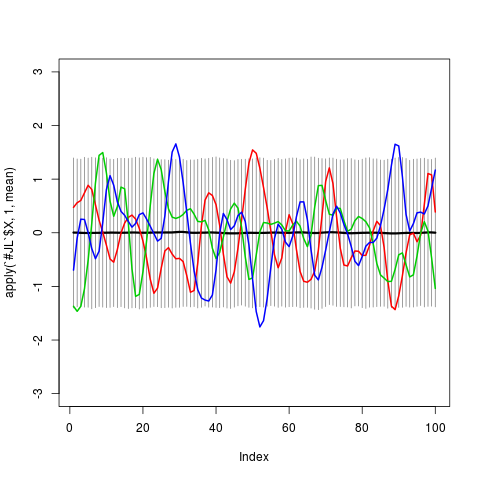

0.178103 seconds (37.95 k allocations: 9.356 MB)


RCall.RObject{RCall.NilSxp}
NULL


In [5]:
m = zeros(100)
@time X = rGP(m, σ²=.5, ϕ=.1, α=2., n=10000);

R"plot(apply($X,1,mean),type='l',ylim=c(-3,3),lwd=3)"
R"ci <- apply($X,1,quantile,c(.025,.975))"
R"add.errbar(t(ci),col=rgb(0,0,0,.5))"
R"""
for (i in 1:3) lines($X[,i],col=i+1,lwd=2)
"""
